In [53]:
dataset= r"D:\AI\Neural_Network\diabetes_dataset.csv"


In [55]:
import pandas as pd
df=pd.read_csv(dataset)
df.head()

,Age,Pregnancies,BMI,Glucose,BloodPressure,HbA1c,LDL,HDL,Triglycerides,WaistCircumference,HipCircumference,WHR,FamilyHistory,DietType,Hypertension,MedicationUse,Outcome
0,69,5,28.39,130.1,77.0,5.4,130.4,44.0,50.0,90.5,107.9,0.84,0,0,0,1,0
1,32,1,26.49,116.5,72.0,4.5,87.4,54.2,129.9,113.3,81.4,1.39,0,0,0,0,0
2,89,13,25.34,101.0,82.0,4.9,112.5,56.8,177.6,84.7,107.2,0.79,0,0,0,1,0
3,78,13,29.91,146.0,104.0,5.7,50.7,39.1,117.0,108.9,110.0,0.99,0,0,0,1,1
4,38,8,24.56,103.2,74.0,4.7,102.5,29.1,145.9,84.1,92.8,0.91,0,1,0,0,0


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X=df.drop('Outcome', axis=1)
y=df['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.linear_model import LogisticRegression
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train.shape 

(7630, 16)

In [59]:
X_train.shape

(7630, 16)

In [61]:
!pip install tensorflow


In [81]:
# Install tensorflow if not already installed
%pip install tensorflow

from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras import layers
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(8, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Note: you may need to restart the kernel to use updated packages.


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [83]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_split=0.2)

Epoch 1/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.7689 - loss: 0.4754 - val_accuracy: 0.9613 - val_loss: 0.1559
Epoch 2/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9670 - loss: 0.1215 - val_accuracy: 0.9843 - val_loss: 0.0567
Epoch 3/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9809 - loss: 0.0541 - val_accuracy: 0.9882 - val_loss: 0.0368
Epoch 4/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9861 - loss: 0.0358 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 5/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9905 - loss: 0.0293 - val_accuracy: 0.9915 - val_loss: 0.0241
Epoch 6/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9921 - loss: 0.0241 - val_accuracy: 0.9908 - val_loss: 0.0223
Epoch 7/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.0210 - val_accuracy: 0.9934 - val_loss: 0.0185
Epoch 8/50
382/382 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9934 - loss: 0.0183 - val_accuracy: 0.

In [85]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy: ", test_accuracy)
print("Test Loss: ", test_loss)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9973 - loss: 0.0076
Test Accuracy:  0.9952830076217651
Test Loss:  0.014530380256474018


In [87]:
import matplotlib.pyplot as plt

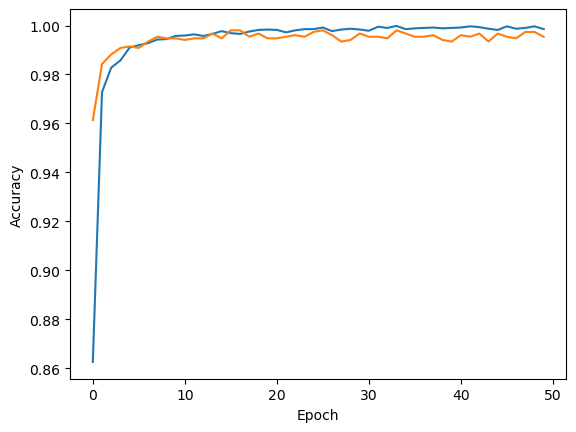

In [89]:
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.show()

In [91]:
import pickle 
with open("nn_diabetic_prediction_model.pkl","wb") as f:
    pickle.dump((model, scaler), f)
    

In [93]:
with open("nn_diabetic_prediction_model.pkl", "rb")as f:
    model, scaler = pickle.load(f)

sample = X_test[1].reshape(1, -1)

In [95]:
prediction = model.predict(sample)[0][0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step


In [97]:
prediction

1.0

In [113]:
diabetes_threshold = 0.5

In [115]:
if prediction > diabetes_threshold:
    print("The sample is of diabetic patient")
else:
    print("The chance of having diabetic is very low")
    

The sample is of diabetic patient
